### Steps
1. Data Loading
2. Rmove unnecessary characters
  * Make the text lowercase
  * Remove text in square brackets
  * Remove punctuation
  * Remove words containing numbers
3. Lemmatization and Use POS tags to get relevant words from the texts.
4. TF-IDF vectorization
5. Applying models

In [1]:
import json
import pandas as pd
import numpy as np

import re, nltk, spacy
import en_core_web_sm
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

!pip install eli5
import eli5
# !pip install pyspellchecker
# from spellchecker import SpellChecker

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from warnings import filterwarnings
filterwarnings('ignore')

random_state = 10

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
%cd /content/drive/MyDrive/
%ls

/content/drive/MyDrive/Job/MLOPS/Upgrad/NLP/Notebooks/Projects/ATC(Automatic_ticket_classification)
ATC_Final.ipynb       complaints-2021-05-14_08_16.json  tweets_df_clean1.csv
ATC.ipynb             complaints.csv                    tweets_df_clean2.csv
catscatter.py         df_clean.csv                      tweets_H_df.csv
clean_complaints.csv  tweets_clean_comp2.csv            tweets_W_df.csv
comp_data.csv         tweets_clean_comp.csv


In [3]:
stopwords = "'d,'ll,'m,'re,'s,'ve,0,000,1,10,2,3,4,5,6,7,8,9,a,aa,aaa,about,above,across,after,afternoon,afterwards,again,against,all,almost,alone,along,already,also,although,always,am,among,amongst,amount,an,and,another,anyany,how,anyone,anything,anyway,anywhere,appare,around,as,ask,asked,asking,asks,at,back,be,became,because,become,becomes,becoming,been,before,beforehand,behind,being,below,beside,besides,between,beyond,both,bottom,brother,but,by,ca,call,called,calling,calls,came,can,cannot,com,come,comes,coming,comment,commented,commenting,comments,could,couldn,daughter,day,days,did,didn,do,does,doesn,doing,don,done,down,dr,dr.,due,during,each,edt,eight,either,el,even,else,elsewhere,empty,enough,est,even,evening,ever,every,everyone,everything,everywhere,except,facebookfamilyfatherfeelfeelingfeelsfeltfewfifteenfiftyfindfindingfindsfirstfiveforformerformerlyfortyfoundfourfridayfriendfromfrontfullfurthergavegetgetsgettinggivegivengivesgivinggmailgogoesgoinggonegooglegorngotgottenhadhashavehehenceherherehereafterherebyhereinhereuponhersherselfhimhimselfhishourhourshowhoweverhrefhttphttpshundrediifimageinincludeincludedincludesincludingindeedintoisisnititsitselfjustkeepknewknowknowingknownknowslastlatterlatterlyleastlesslifelikelikedlikeslikinglive,look,looked,looking,looks,love,loved,loves,loving,made,make,makes,making,man,many,may,me,meanwhile,media,might,mine,minute,minutes,monday,month,months,more,moreover,morning,most,mostly,mother,move,mr,mr.,mrs,mrs.,ms,ms.,much,must,mustn,my,myself,n't,name,namely,neither,never,nevertheless,new,news,next,night,nine,no,nobody,none,noone,nor,not,nothing,now,nowhere,n’t,of,off,often,on,once,one,online,only,onto,or,other,others,otherwise,our,ours,ourselves,out,over,own,page,part,people,per,perhaps,photo,please,post,put,quite,ratherre,really,ref,regarding,said,same,saturday,saw,say,saying,says,see,seeing,seem,seemed,seeming,seems,seen,sees,serious,several,she,should,shouldn,showside,since,sister,six,sixty,so,social,some,somehow,someone,something,sometimes,ometimes,somewhere,son,spake,speak,speaking,speaks,spoke,spoken,still,stream,such,sunday,take,taken,takes,taking,talk,talked,talking,talks,tell,telling,tells,ten,than,that,the,their,them,themselves,then,thence,there,thereafter,,thereby,therefore,therein,there,upon,these,they,thing,think,thinked,thinking,thinks,third,this,those,though,thought,three,through,throughout,thru,thursday,thus,time,times,to,today,together,told,tomorrow,too,took,top,toward,towards,tried,tries,try,trying,tuesday,twelve,twenty,two,under,unless,until,upupon,us,use,used,user,uses,using,various,very,via,video,want,wanted,wanting,wants,was,way,we,wednesday,week,weeks,well,wentwere,what,whatever,when,whence,whenever,where,whereafter,whereas,whereby,wherein,where,upon,wherever,whether,which,while,whither,who,whoever,whole,whom,whose,why,will,with,within,without,woman,would,write,writes,writing,written,wrote,year,years,yesterday,yet,york,you,your,yours,yourself,yourselves,‘d,‘ll,‘m,‘re,‘s,‘ve,’d,’ll,’m,’re,’s,’ve".split(",")
stopwords.extend(["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him","his","himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being","have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as","until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before","after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then","once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some","such","no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"])
print(len(stopwords))

551


In [4]:
# spell = SpellChecker()

In [4]:
model = spacy.load("en_core_web_sm")

In [5]:
def clean_text(sentence):
  pattern1 = "[(x*)(X*)//]"
  pattern2 = "_#"
  pattern3 = "[\(\[].*?[\)\]]"
  pattern4 = "(\\n)"
  pattern5 = "[^\w\s]"
  pattern6 = "[0-9]"
  if len(sentence) == 0:
    return "no_complaints"
  else:
    cleaned_sent = ""
    for word in sentence.split():
      word = word.lower()
      word = re.sub(pattern1, "", word)
      word = re.sub(pattern2, "", word)
      word = re.sub(pattern3, "", word)
      word = re.sub(pattern4, "", word)
      word = re.sub(pattern5, "", word)
      word = re.sub(pattern6, "", word)
      if word in stopwords:
        word = ""
      cleaned_sent+= word +" "#spell.correction(word) +" "
    # To remove multiple spaces used regex and to remove space at begining and end used strip function
    return re.sub(' +', ' ',cleaned_sent.strip())
    
def get_lemma(sentence, cleaned=False):
  if not cleaned:
    sentence = clean_text(sentence)
  lemma = ""
  noun = ""
  pos = ""
  if sentence == "no_complaints":
    lemma = "empty_sent" 
    noun = "empty_sent"
    pos = "empty_sent"
  else:
    tokens = model(sentence)
    for tok in tokens:
      if tok.lemma_ == "-PRON-":
        tok.lemma_ = tok.orth_.lower()
        tok.lemma = tok.orth
      if tok.pos_ in ["NOUN", "PROPN"]:
        noun += tok.lemma_ + " "
      lemma += tok.lemma_ + " "
      pos += tok.pos_ + " "
  lemma = re.sub(' +', ' ',lemma.strip())
  noun = re.sub(' +', ' ',noun.strip())
  pos = re.sub(' +', ' ',pos.strip())
  return lemma, noun, pos

def tf_idf_vect(feature):
  # ignoring terms having => max_df: freq > 95% and min_df: freq < 2
  vect = TfidfVectorizer(max_df=0.95, min_df=2)
  X = vect.fit_transform(feature.tolist())
  return X, vect

def nmf_dec(n_comp, feature):
  # Creating TF-IDF matrix
  (X, vect) = tf_idf_vect(feature)
  # Creatomg NMF 
  nmf = NMF(n_comp, random_state=random_state)
  W = nmf.fit_transform(X)
  print(f"TF-IDF dim: {X.shape}, \t Feature_dim: {W.shape}, \t Component_dim: {nmf.components_.shape}")
  H = nmf.components_
  # Creating Dataframe for W and H matrix
  W_df= pd.DataFrame(W, columns=[f"Topic {i+1}" for i in range(n_comp)],
                      index=[f'Doc {i+1}' for i in range(X.shape[0])])
  W_df['max_topic'] = W_df.apply(lambda x: x.idxmax(), axis=1)
  H_df = pd.DataFrame(H, index=[f"Topic {i+1}" for i in range(n_comp)],
                      columns=vect.get_feature_names())
  return W, H, W_df, H_df

def word_cld(feature, title=""):
  plt.figure(figsize=(10.0,6.0))
  wordcloud = WordCloud().generate(str(feature))
  fig = plt.figure(1)
  plt.imshow(wordcloud)
  plt.title(title, fontdict={'size': 15})
  plt.axis('off')
  plt.show();

def vis_comp(feature):
  %matplotlib inline
  plt.figure(figsize=(10,6))
  doc_lens = [len(d) for d in feature]
  plt.hist(doc_lens, bins = 50)
  plt.show()

def top_word_count(top_n_feat, vect, H):
  fig, ax = plt.subplots(nrows=top_n_feat, ncols=1, figsize=(12, 8))
  words = vect.get_feature_names()
  xticks = np.arange(H.shape[1])[1::500]
  xticklabels = words[1::500]
  for i in range(top_n_feat):
      H.loc[f'Topic {i+1}'].plot(ax=ax[i])
      ax[i].set_xticks(xticks)
      ax[i].set_xticklabels(xticklabels, rotation=60)
      ax[i].set_title(f'Topic {i + 1}')
  plt.tight_layout()

def plot_top_feat(top_n_feat, H):
  fig, ax = plt.subplots(nrows=top_n_feat, ncols=1, figsize=(12, 8))
  for i in range(top_n_feat):
      words = H.loc[f'Topic {i + 1}'].sort_values(ascending=False)[:top_n_feat*2]
      words.plot(ax=ax[i], kind='bar', rot=0)
      ax[i].set_title(f'Topic {i + 1}')
  plt.tight_layout()

## Data Loading

In [32]:
%%time 
file = open("complaints-2021-05-14_08_16.json")
tweets_df = pd.json_normalize(json.load(file))
tweets_df.rename(columns={'_index':'index', '_type':'type', '_id':'id', '_score':'score',
                   '_source.tags':'source.tags', '_source.zip_code':'source.zip_code',
                   '_source.complaint_id':'source.complaint_id', '_source.issue':'source.issue', '_source.date_received':'source.date_received',
                   '_source.state':'source.state', '_source.consumer_disputed':'source.consumer_disputed', '_source.product':'source.product',
                   '_source.company_response':'source.company_response', '_source.company':'source.company', '_source.submitted_via':'source.submitted_via',
                   '_source.date_sent_to_company':'source.date_sent_to_company', '_source.company_public_response':'source.company_public_response',
                   '_source.sub_product':'source.sub_product', '_source.timely':'source.timely',
                   '_source.complaint_what_happened':'source.complaint_what_happened', '_source.sub_issue':'source.sub_issue',
                   '_source.consumer_consent_provided':'source.consumer_consent_provided'}, inplace=True)
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   index                             78313 non-null  object 
 1   type                              78313 non-null  object 
 2   id                                78313 non-null  object 
 3   score                             78313 non-null  float64
 4   source.tags                       10900 non-null  object 
 5   source.zip_code                   71556 non-null  object 
 6   source.complaint_id               78313 non-null  object 
 7   source.issue                      78313 non-null  object 
 8   source.date_received              78313 non-null  object 
 9   source.state                      76322 non-null  object 
 10  source.consumer_disputed          78313 non-null  object 
 11  source.product                    78313 non-null  object 
 12  sour

In [27]:
df_clean.to_csv("tweets_df_clean2.csv", index=False)

## Data preprocessing

In [20]:
tweets_df["source.complaint_what_happened"].iloc[:5]

0                                                     
1    Good morning my name is XXXX XXXX and I apprec...
2    I upgraded my XXXX XXXX card in XX/XX/2018 and...
3                                                     
4                                                     
Name: source.complaint_what_happened, dtype: object

In [66]:
for sent in tweets_df["source.complaint_what_happened"].iloc[:5]:
  # print(clean_text(sent))
  print(get_lemma(sent))

('empty_sent', 'empty_sent', 'empty_sent')
('good appreciate help stop chase bank cardmember service chase debt verification send statement acceptable bank validate debt instead receive mail attempt collect debt right know information consumer chase account thank advance help', 'help chase bank cardmember service debt verification statement bank validate debt mail debt information consumer chase account thank help', 'ADJ VERB NOUN VERB PROPN PROPN NOUN NOUN VERB NOUN NOUN VERB NOUN ADJ NOUN NOUN NOUN ADV VERB NOUN VERB ADJ NOUN ADJ VERB NOUN NOUN NOUN NOUN NOUN VERB NOUN')
('upgraded card agent upgrade anniversary date change turn agent give wrong information order upgrade account change anniversary date consent recording agent mislead', 'card agent upgrade anniversary date change agent information order upgrade account anniversary date consent recording agent', 'ADJ NOUN NOUN PROPN NOUN NOUN NOUN VERB NOUN VERB ADJ NOUN NOUN PROPN NOUN VERB NOUN NOUN NOUN NOUN NOUN VERB')
('empty_sent

In [77]:
%%time
tweets_df["source.complaint_what_happened"] = [clean_text(sent) for sent in tweets_df["source.complaint_what_happened"]]

CPU times: user 1min 10s, sys: 157 ms, total: 1min 11s
Wall time: 1min 11s


In [7]:
%%time
tweets_df = pd.read_csv("tweets_clean_comp.csv", lineterminator="\n")
lemma_sent = []
noun_sent = []
pos_sent = []
for sent in tweets_df["source.complaint_what_happened"]:
  (lemma, noun, pos) = get_lemma(sent)
  lemma_sent.append(lemma)
  noun_sent.append(noun)
  pos_sent.append(pos)

CPU times: user 7min 43s, sys: 3.08 s, total: 7min 46s
Wall time: 7min 46s


In [9]:
comp_data = pd.DataFrame({"documents":lemma_sent,
                                  "noun":noun_sent,
                                  "pos":pos_sent})
comp_data.head(5)

,documents,noun,pos
0,empty_sent,empty_sent,empty_sent
1,good appreciate help stop chase bank cardmembe...,help chase bank cardmember service debt verifi...,ADJ VERB NOUN VERB PROPN PROPN NOUN NOUN VERB ...
2,upgraded card agent upgrade anniversary date c...,card agent upgrade anniversary date change age...,ADJ NOUN NOUN PROPN NOUN NOUN NOUN VERB NOUN V...
3,empty_sent,empty_sent,empty_sent
4,empty_sent,empty_sent,empty_sent


In [10]:
comp_data = comp_data[comp_data.documents != 'empty_sent']
comp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21072 entries, 1 to 78312
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   documents  21072 non-null  object
 1   noun       21072 non-null  object
 2   pos        21072 non-null  object
dtypes: object(3)
memory usage: 658.5+ KB


In [11]:
%%time
comp_data['documents'] = comp_data['documents'].apply(lambda x: spell.correction(x))
comp_data['noun'] = comp_data['noun'].apply(lambda x: spell.correction(x))

CPU times: user 32min 37s, sys: 4.78 s, total: 32min 42s
Wall time: 32min 44s


In [12]:
comp_data['documents'].iloc[:5]

1     good appreciate help stop chase bank cardmembe...
2     upgraded card agent upgrade anniversary date c...
10    chase card report however fraudulent applicati...
11    book ticket offer apply ticket apply reward ca...
14    grand give check deposit chase account fund cl...
Name: documents, dtype: object

## TF-IDF Vectorizer

In [15]:
comp_data = pd.read_csv("tweets_clean_comp2.csv", lineterminator="\n")
comp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21072 entries, 0 to 21071
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   documents  21072 non-null  object
 1   noun       21072 non-null  object
 2   pos        21072 non-null  object
dtypes: object(3)
memory usage: 494.0+ KB


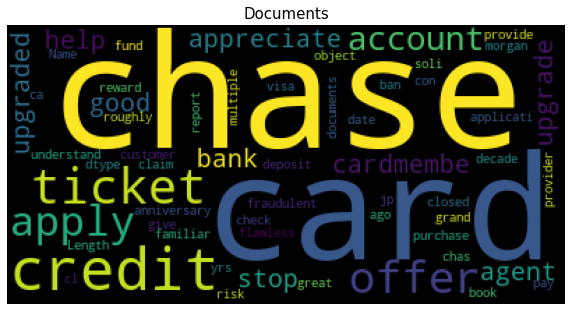

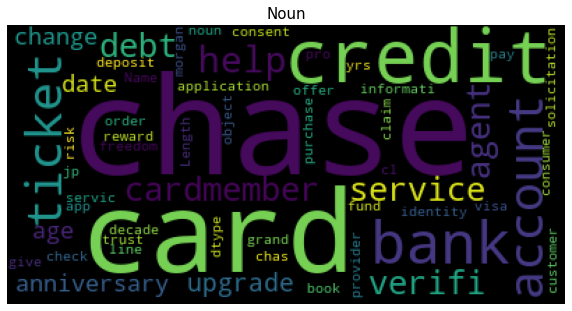

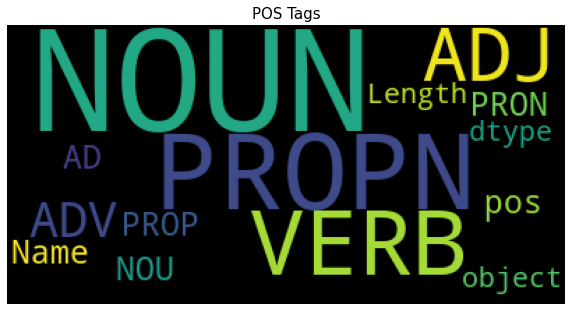

In [68]:
word_cld(comp_data.documents, "Documents")
word_cld(comp_data.noun, "Noun")
word_cld(comp_data.pos, "POS Tags")

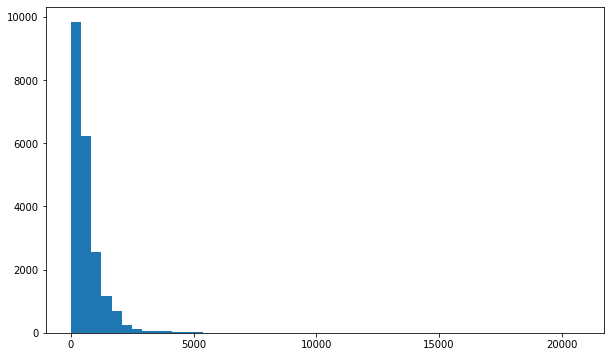

In [51]:
vis_comp(comp_data.documents)

In [16]:
%%time
(X, vect) = tf_idf_vect(comp_data.documents)

CPU times: user 1.42 s, sys: 68.2 ms, total: 1.49 s
Wall time: 1.49 s


In [19]:
%%time
'''
NMF will generate two matrices whose product is approximate to TF-IDF= M_rows(number of docs) * N_cols(Number of unigrams/words)
The Features Matrix(W):  combines topics into documents: M_rows * N_topics
The Components Matrix(H): represents topics: N_topics * N_cols
'''
(W, H, W_df, H_df) = nmf_dec(5, comp_data.documents)

TF-IDF dim: (21072, 12768), 	 Feature_dim: (21072, 5), 	 Component_dim: (5, 12768)
CPU times: user 4.67 s, sys: 1.03 s, total: 5.71 s
Wall time: 4.93 s


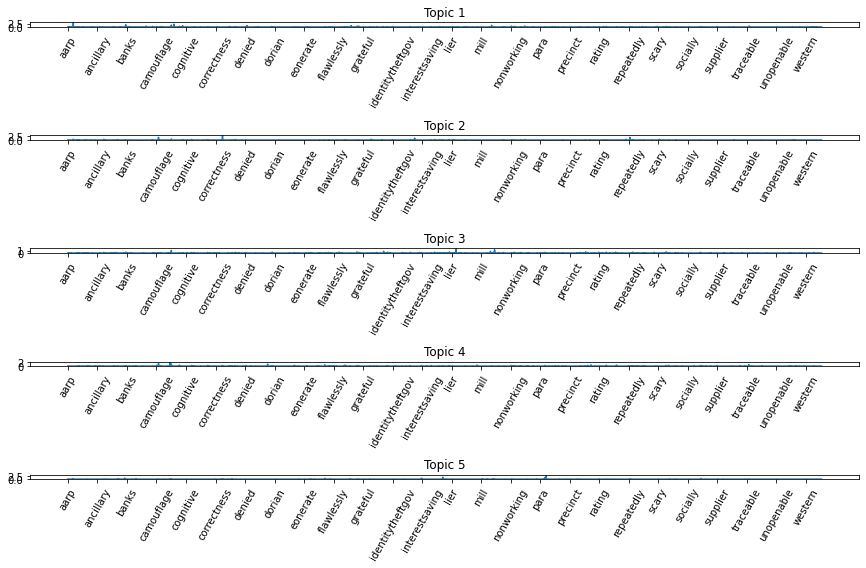

In [20]:
top_word_count(5, vect, H_df)

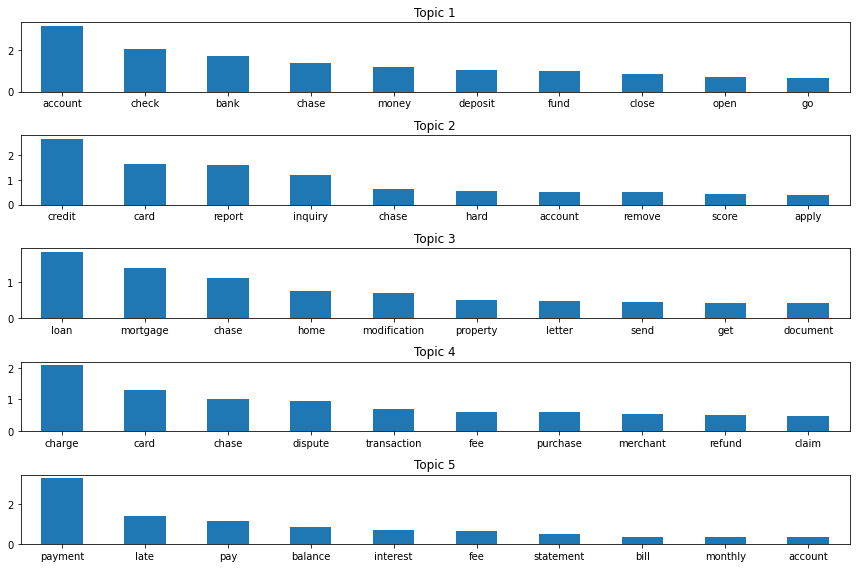

In [21]:
plot_top_feat(5, H_df)

In [23]:
H_df.shape

(5, 12768)

In [37]:
W_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21072 entries, Doc 1 to Doc 21072
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Topic 1    21072 non-null  float64
 1   Topic 2    21072 non-null  float64
 2   Topic 3    21072 non-null  float64
 3   Topic 4    21072 non-null  float64
 4   Topic 5    21072 non-null  float64
 5   max_topic  21072 non-null  object 
dtypes: float64(5), object(1)
memory usage: 1.1+ MB


In [14]:
%%time
topic_mapping = { 'Topic 1': 'Credit card or prepaid card',
               'Topic 2': 'Theft/Dispute Reporting',
               'Topic 3': 'Bank Account services',
               'Topic 4': 'Others',
               'Topic 5': 'Mortgage/Loan' }
# Mapping max topic to respecive Categories
nmf_top = W_df['max_topic'].map(lambda x: topic_mapping[x])
# Making dataframe of document words/token
df_clean = pd.DataFrame(nmf_top.reset_index())
df_clean.rename(columns={"index":"documents"}, inplace=True)
df_clean['documents'] = comp_data.documents

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 9.78 µs


In [25]:
# Checking the new dataframe df_clean
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21072 entries, 0 to 21071
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   documents  21072 non-null  object
 1   max_topic  21072 non-null  object
dtypes: object(2)
memory usage: 329.4+ KB


In [26]:
#Print the first 5 Complaint for each of the Topics
for key in topic_mapping.keys():
  print(f"Category: {topic_mapping[key]}", '\n', df_clean[df_clean.max_topic == topic_mapping[key]]['documents'].nunique(),'\n',
        "--".join(df_clean[df_clean.max_topic == topic_mapping[key]]['documents'].iloc[:1]),'\n')

Category: Credit card or prepaid card 
 5131 
 grand give check deposit chase account fund clear chase bank closed account pay money nee speek grand check clear money chase bank refuse pay money grand chase verify check owner country date happen check number claim number chase 

Category: Theft/Dispute Reporting 
 3885 
 chase card report however fraudulent application submit identity consent fraudulently obtain service etend credit verify identity applicant 

Category: Bank Account services 
 4163 
 good appreciate help stop chase bank cardmember service chase debt verification send statement acceptable bank validate debt instead receive mail attempt collect debt right know information consumer chase account thank advance help 

Category: Others 
 5341 
 upgraded card agent upgrade anniversary date change turn agent give wrong information order upgrade account change anniversary date consent recording agent mislead 

Category: Mortgage/Loan 
 2268 
 purchase payment minimum payment cl

## Model Training

In [6]:
df_clean = pd.read_csv("tweets_df_clean2.csv", lineterminator="\n")
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21072 entries, 0 to 21071
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   documents  21072 non-null  object
 1   max_topic  21072 non-null  object
dtypes: object(2)
memory usage: 329.4+ KB


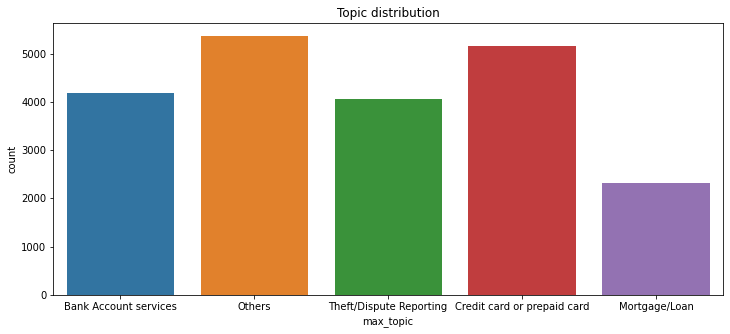

In [8]:
# Topic wise distribution
plt.figure(figsize=(12, 5))
sns.countplot(df_clean['max_topic']);
plt.title('Topic distribution');

In [7]:
%%time
X_feat = df_clean["documents"]
y_feat = df_clean["max_topic"]
(X_feat_text, train_feat_vect) = tf_idf_vect(X_feat)
print(X_feat_text.shape)
X_train, X_test, y_train, y_test = train_test_split(X_feat_text, y_feat, test_size=0.3, random_state=random_state)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(21072, 12768)
(14750, 12768) (6322, 12768) (14750,) (6322,)
CPU times: user 1.68 s, sys: 33.6 ms, total: 1.72 s
Wall time: 1.71 s


#### LogisticRegression
penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, 
solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None

* penalty{‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2

* Cfloat, default=1.0 : Inverse of regularization strength; must be a positive float.
  - higher values of C correspond to less regularization (where we can specify the regularization function).
  - C is actually the Inverse of regularization strength(lambda)

* tolfloat, default=1e-4 : Tolerance for stopping criteria.

* solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
  - For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;
  - For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;
  - ‘liblinear’ is limited to one-versus-rest schemes.

* max_iterint, default=100 : Maximum number of iterations taken for the solvers to converge

* multi_class{‘auto’, ‘ovr’, ‘multinomial’}, default=’auto’
  - ‘ovr’, then a binary problem is fit for each label.
  - ‘multinomial’ the loss minimised is the multinomial loss fit across the entire probability distribution, even when the data is binary
    - ‘multinomial’ is unavailable when solver=’liblinear’.
  - ‘auto’ selects ‘ovr’ if the data is binary, or if solver=’liblinear’, and otherwise selects ‘multinomial’.

* n_jobs: int, default=None
  - Number of CPU cores used when parallelizing over classes if multi_class=’ovr’”.
  - This parameter is ignored when the solver is set to ‘liblinear’ regardless of whether ‘multi_class’ is specified or not. 

In [14]:
%%time
# Applying Logistic Regression model
logit = LogisticRegression(C=5e1, solver='lbfgs', multi_class='multinomial',
                           random_state=random_state,n_jobs=4)
# cross validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
cv = cross_val_score(logit, X_train, y_train, cv=skf, scoring='f1_micro')

CPU times: user 375 ms, sys: 109 ms, total: 484 ms
Wall time: 16.1 s


In [15]:
print(cv, cv.mean())

[0.94745763 0.95762712 0.9559322  0.95694915 0.95728814] 0.9550508474576272


In [16]:
%%time
logit.fit(X_train, y_train)

CPU times: user 51.8 ms, sys: 12.2 ms, total: 64 ms
Wall time: 3.25 s


LogisticRegression(C=50.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=4, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
eli5.show_weights(estimator=logit,feature_names=list(train_feat_vect.get_feature_names()),top=(10,5))

In [21]:
test_pred = logit.predict(X_test)
pd.DataFrame(test_pred, columns=['label']).head(10)

,label
0,Credit card or prepaid card
1,Mortgage/Loan
2,Others
3,Bank Account services
4,Theft/Dispute Reporting
5,Bank Account services
6,Others
7,Others
8,Credit card or prepaid card
9,Bank Account services


In [ ]:
eli5.show_prediction()

In [25]:
# Contribution of words(which are colored according to their weights) for different topics
eli5.show_prediction(logit, doc=X_feat[0], vec=train_feat_vect)

### Benchmarking ML models
* https://scikit-learn.org/stable/auto_examples/text/plot_document_classification_20newsgroups.html?highlight=naive%20bayes

In [27]:
import logging
import numpy as np
from optparse import OptionParser
import sys

from sklearn.linear_model import RidgeClassifier, PassiveAggressiveClassifier, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, ComplementNB

from time import time
from sklearn import metrics

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.pipeline import Pipeline
from sklearn.utils.extmath import density
from sklearn import metrics

In [29]:
# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')

op = OptionParser()
op.add_option("--report",
              action="store_true", dest="print_report",
              help="Print a detailed classification report.")
op.add_option("--chi2_select",
              action="store", type="int", dest="select_chi2",
              help="Select some number of features using a chi-squared test")
op.add_option("--confusion_matrix",
              action="store_true", dest="print_cm",
              help="Print the confusion matrix.")
op.add_option("--top10",
              action="store_true", dest="print_top10",
              help="Print ten most discriminative terms per class"
                   " for every classifier.")
op.add_option("--all_categories",
              action="store_true", dest="all_categories",
              help="Whether to use all categories or not.")
op.add_option("--use_hashing",
              action="store_true",
              help="Use a hashing vectorizer.")
op.add_option("--n_features",
              action="store", type=int, default=2 ** 16,
              help="n_features when using the hashing vectorizer.")
op.add_option("--filtered",
              action="store_true",
              help="Remove newsgroup information that is easily overfit: "
                   "headers, signatures, and quoting.")


def is_interactive():
    return not hasattr(sys.modules['__main__'], '__file__')


# work-around for Jupyter notebook and IPython console
argv = [] if is_interactive() else sys.argv[1:]
(opts, args) = op.parse_args(argv)
if len(args) > 0:
    op.error("this script takes no arguments.")
    sys.exit(1)

print(__doc__)
op.print_help()
print()

Automatically created module for IPython interactive environment
Usage: ipykernel_launcher.py [options]

Options:
  -h, --help            show this help message and exit
  --report              Print a detailed classification report.
  --chi2_select=SELECT_CHI2
                        Select some number of features using a chi-squared
                        test
  --confusion_matrix    Print the confusion matrix.
  --top10               Print ten most discriminative terms per class for
                        every classifier.
  --all_categories      Whether to use all categories or not.
  --use_hashing         Use a hashing vectorizer.
  --n_features=N_FEATURES
                        n_features when using the hashing vectorizer.
  --filtered            Remove newsgroup information that is easily overfit:
                        headers, signatures, and quoting.



In [37]:
if opts.all_categories:
    categories = None
else:
    categories = topic_mapping.values()

# order of labels in `target_names` can be different from `categories`
target_names = y_feat

# mapping from integer feature name to original token string
if opts.use_hashing:
    feature_names = None
else:
    feature_names = train_feat_vect.get_feature_names()

if opts.select_chi2:
    print("Extracting %d best features by a chi-squared test" %
          opts.select_chi2)
    t0 = time()
    ch2 = SelectKBest(chi2, k=opts.select_chi2)
    X_train = ch2.fit_transform(X_train, y_train)
    X_test = ch2.transform(X_test)
    if feature_names is not None:
        # keep selected feature names
        feature_names = feature_names[ch2.get_support()]
    print("done in %fs" % (time() - t0))
    print()


def trim(s):
    """Trim string to fit on terminal (assuming 80-column display)"""
    return s if len(s) <= 80 else s[:77] + "..."

In [38]:
target_names = topic_mapping.values()
def benchmark(clf):
  print('_' * 80)
  print("Training: ")
  print(clf)
  t0 = time()
  clf.fit(X_train, y_train)
  train_time = time() - t0
  print("train time: %0.3fs" % train_time)
  t0 = time()
  pred = clf.predict(X_test)
  test_time = time() - t0
  print("test time:  %0.3fs" % test_time)
  score = metrics.accuracy_score(y_test, pred)
  print("accuracy:   %0.3f" % score)
  if hasattr(clf, 'coef_'):
    print("dimensionality: %d" % clf.coef_.shape[1])
    print("density: %f" % density(clf.coef_))
    if opts.print_top10 and feature_names is not None:
      print("top 10 keywords per class:")
      for i, label in enumerate(target_names):
          top10 = np.argsort(clf.coef_[i])[-10:]
          print(trim("%s: %s" % (label, " ".join(feature_names[top10]))))
    print()
  if opts.print_report:
    print("classification report:")
    print(metrics.classification_report(y_test, pred,
                                          target_names=target_names))
  if opts.print_cm:
    print("confusion matrix:")
    print(metrics.confusion_matrix(y_test, pred))
  print()
  clf_descr = str(clf).split('(')[0]
  return (clf_descr, score, train_time, test_time)

In [39]:
%%time
results = []
for clf, name in ((RidgeClassifier(tol=1e-2, solver="sag"), "Ridge Classifier"),
                  (MLPClassifier(max_iter=50), "MLPClassifier"),
                  (PassiveAggressiveClassifier(max_iter=50),"Passive-Aggressive"),
                  (KNeighborsClassifier(n_neighbors=50), "kNN"),
                (RandomForestClassifier(), "Random forest")):
    print('=' * 80)
    print(name)
    results.append(benchmark(clf))

for penalty in ["l2", "l1"]:
    print('=' * 80)
    print("%s penalty" % penalty.upper())
    # Train Liblinear model
    results.append(benchmark(LinearSVC(penalty=penalty, dual=False,
                                       tol=1e-3)))

    # Train SGD model
    results.append(benchmark(SGDClassifier(alpha=.0001, max_iter=50,
                                           penalty=penalty)))

# Train SGD with Elastic Net penalty
print('=' * 80)
print("Elastic-Net penalty")
results.append(benchmark(SGDClassifier(alpha=.0001, max_iter=50,
                                       penalty="elasticnet")))

# Train NearestCentroid without threshold
print('=' * 80)
print("NearestCentroid (aka Rocchio classifier)")
results.append(benchmark(NearestCentroid()))

# Train sparse Naive Bayes classifiers
print('=' * 80)
print("Naive Bayes")
results.append(benchmark(MultinomialNB(alpha=.01)))
results.append(benchmark(BernoulliNB(alpha=.01)))
results.append(benchmark(ComplementNB(alpha=.1)))

print('=' * 80)
print("LinearSVC with L1-based feature selection")
# The smaller C, the stronger the regularization.
# The more regularization, the more sparsity.
results.append(benchmark(Pipeline([
                                   ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False,tol=1e-3))),
                                   ('classification', LinearSVC(penalty="l2"))
                                   ])))

Ridge Classifier
________________________________________________________________________________
Training: 
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None, solver='sag',
                tol=0.01)
train time: 0.972s
test time:  0.005s
accuracy:   0.894
dimensionality: 12768
density: 0.978540


MLPClassifier
________________________________________________________________________________
Training: 
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=50,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
        

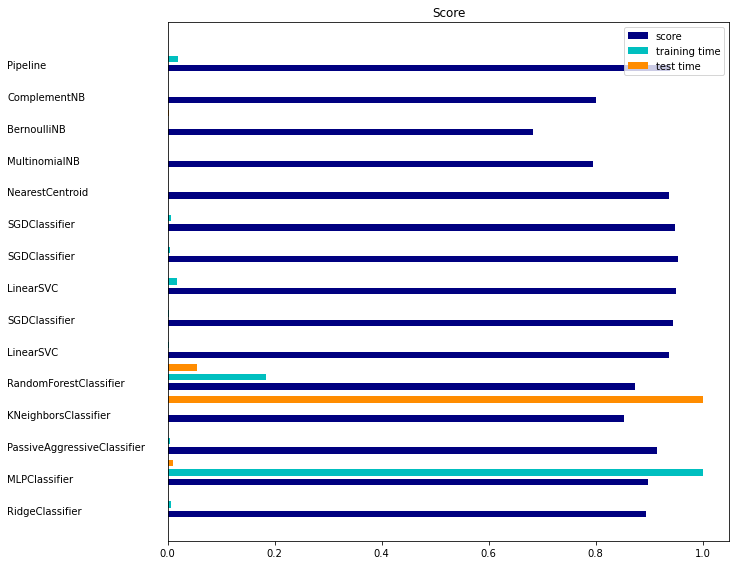

In [40]:
indices = np.arange(len(results))

results = [[x[i] for x in results] for i in range(4)]

clf_names, score, training_time, test_time = results
training_time = np.array(training_time) / np.max(training_time)
test_time = np.array(test_time) / np.max(test_time)

plt.figure(figsize=(12, 8))
plt.title("Score")
plt.barh(indices, score, .2, label="score", color='navy')
plt.barh(indices + .3, training_time, .2, label="training time",
         color='c')
plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
    plt.text(-.3, i, c)

plt.show()